In [1]:
import pandas as pd
import time
import seaborn as sns
import matplotlib.pyplot as plt
import datetime
import numpy as np
import pymysql as pms
db = pms.connect("140.118.126.136", "123", "1234567890", "test",cursorclass=pms.cursors.DictCursor)
cursor = db.cursor()
cursor.execute("select * from btc_usd order by DATE DESC")
result = cursor.fetchall()
btc_data = pd.DataFrame(result)
btc_data = btc_data.assign(DATE=pd.to_datetime(btc_data['DATE']))
btc_data['VOLUME'] = (pd.to_numeric(btc_data['VOLUME'], errors='coerce').fillna(0))
btc_data['VOLUME'] = btc_data['VOLUME'].astype('int64')
btc_data

,ASK,BID,DATE,HIGH,LAST,LOW,MID,VOLUME
0,7926.700,7925.800,2018-03-27,8277.800,7926.50,7716.600,7926.250,49132
1,8187.900,8183.800,2018-03-26,8516.900,8177.40,7835.900,8185.850,58065
2,8480.800,8479.900,2018-03-25,8674.400,8481.00,8364.800,8480.350,30079
3,8643.800,8639.700,2018-03-24,9050.300,8639.70,8556.000,8641.750,44565
4,8690.900,8690.200,2018-03-22,9095.920,8690.90,8450.000,8690.550,54383
5,8870.100,8870.000,2018-03-21,9177.500,8870.00,8752.000,8870.050,42946
6,8932.000,8931.900,2018-03-20,9040.000,8932.00,8305.100,8931.950,55419
7,8500.000,8499.900,2018-03-19,8717.000,8505.00,8085.700,8499.950,74323
8,8149.100,8148.800,2018-03-18,8300.000,8147.00,7240.000,8148.950,87116
9,7993.100,7993.000,2018-03-17,8515.900,7993.00,7728.100,7993.050,50245


In [3]:
#def some fun tp process data
def add_newcol(btc_data): #新增closeoffhigh和volatolity欄位，增加模型訓練的準確度
    market_info = btc_data[btc_data['DATE']>='2017-01-01'] #將資料只獲取從2017-01-01之後的內容，存到 market_info
    kwargs = { 'CLOSE_OFF_HIGH': lambda x: 2*(x['HIGH'] - x['LAST']) / (x['HIGH'] - x['LOW']) - 1, # 1:收盤接近最低價  -1:收盤接近最高價  
          'VOLATILITY': lambda x: (x['HIGH'] - x['LOW']) / (x['MID'])}  #越趨近0越看好
    market_info = market_info.assign(**kwargs)
    return market_info
def create_model_data(btc_data):#選取待會訓練模型所需要的資料
    original_model_data = btc_data[["DATE"]+["LAST"]+["VOLUME"]+["CLOSE_OFF_HIGH"]+["VOLATILITY"]]
    original_model_data = original_model_data.sort_values(by='DATE')
    dic={'DATE':pd.to_datetime(datetime.date.today()),'LAST':[0],'VOLUME':[0],'CLOSE_OFF_HIGH':[0],'VOLATILITY':[0]}
    df=pd.DataFrame(dic)
    new_model_data=original_model_data
    new_model_data=new_model_data.append(df,ignore_index=True)
    return original_model_data,new_model_data
def create_input_data(data,window_len):#決定訓練時以多少天的大小作訓練(window_len)，以每個為window_len大小的array，作為待會訓練模型的input
    norm_cols = ['LAST','VOLUME']
    inputs = [] #將Close,Volume以每筆的第一個資料來作正規化，讓值介於-1,1之間
    for i in range(len(data)-window_len):
        temp_set = data[i:(i+window_len)].copy()
        for col in norm_cols:
            temp_set.loc[:, col] = temp_set[col]/temp_set[col].iloc[0] - 1 
        inputs.append(temp_set)
    return inputs
def create_output_data(data,window_len):#模型的輸出
    return (data['LAST'][window_len:].values / data['LAST'][:-window_len].values) - 1
def data_to_np(data):#原本資料的型態為dataframe，這裡將型態轉為numpy array，模型的資料是以這種型態為主
    data = [np.array(datas)for datas in data]
    data = np.array(data)
    return data

In [4]:
market_info = add_newcol(btc_data)
market_info.head()

,ASK,BID,DATE,HIGH,LAST,LOW,MID,VOLUME,CLOSE_OFF_HIGH,VOLATILITY
0,7926.7,7925.8,2018-03-27,8277.80,7926.5,7716.6,7926.25,49132,0.251960,0.070803
1,8187.9,8183.8,2018-03-26,8516.90,8177.4,7835.9,8185.85,58065,-0.002937,0.083192
2,8480.8,8479.9,2018-03-25,8674.40,8481.0,8364.8,8480.35,30079,0.249354,0.036508
3,8643.8,8639.7,2018-03-24,9050.30,8639.7,8556.0,8641.75,44565,0.661339,0.057199
4,8690.9,8690.2,2018-03-22,9095.92,8690.9,8450.0,8690.55,54383,0.254087,0.074324


In [5]:
model_data,new_model_data = create_model_data(market_info)
model_data.head()
new_model_data.tail()

,CLOSE_OFF_HIGH,DATE,LAST,VOLATILITY,VOLUME
437,0.661339,2018-03-24,8639.7,0.057199,44565
438,0.249354,2018-03-25,8481.0,0.036508,30079
439,-0.002937,2018-03-26,8177.4,0.083192,58065
440,0.251960,2018-03-27,7926.5,0.070803,49132
441,0.000000,2018-03-28,0.0,0.000000,0


In [6]:
split_date = '2017-06-01' #將training_set,test_set從這個日期做劃分
training_set, test_set = new_model_data[new_model_data['DATE']<split_date], new_model_data[new_model_data['DATE']>=split_date]
test_set.head()

,CLOSE_OFF_HIGH,DATE,LAST,VOLATILITY,VOLUME
145,-0.145454,2017-06-01,2287.80,0.082248,19095
146,-1.000000,2017-06-02,2390.00,0.053223,11467
147,-0.940120,2017-06-03,2477.20,0.053942,11912
148,-0.672180,2017-06-04,2476.20,0.053756,11862
149,-0.654740,2017-06-05,2618.91,0.067679,15069


In [7]:
training_set = training_set.drop('DATE', 1) #將Date的欄位刪掉，因為之後不會需要用到它，因為後面要將形式轉為np array，故只留數值的部分
test_set = test_set.drop('DATE', 1)

In [8]:
window_len = 10 #決定模型要獲取幾天前的數據，隨意選擇
norm_cols = ['LAST','VOLUME']
LSTM_training_inputs = create_input_data(training_set,10)
LSTM_test_inputs = create_input_data(test_set,10)
LSTM_training_outputs = create_output_data(training_set,10)

In [9]:
LSTM_training_inputs[0]

,CLOSE_OFF_HIGH,LAST,VOLATILITY,VOLUME
0,-0.862872,0.000000,0.023982,0.000000
1,-0.679045,0.033757,0.045317,0.880509
2,-0.242054,0.054717,0.040120,2.050791
3,-0.849057,0.073856,0.025518,0.976773
4,-0.816901,0.178966,0.099767,6.513362
5,0.031693,0.038061,0.314032,11.763117
6,0.642857,-0.070463,0.171409,7.030083
7,-0.937767,-0.060531,0.105767,4.683923
8,0.033582,-0.052462,0.058518,3.298447
9,-0.343405,-0.065797,0.046179,1.320834


In [10]:
#以 np array的形式做處理，當存以數字的形式
LSTM_training_inputs = data_to_np(LSTM_training_inputs)
LSTM_test_inputs = data_to_np(LSTM_test_inputs)

In [11]:
# import the relevant Keras modules

#開始建造LSTM模型
from keras.models import Sequential
from keras.layers import Activation, Dense
from keras.layers import LSTM
from keras.layers import Dropout

#neurons=神經元個數(可自訂),epochs=訓練的次數,lose.optimizer都可更改(但結果以這兩個最好)
def build_model1(inputs, output_size, neurons, activ_func="linear",
                dropout=0.25, loss="mse", optimizer="adam"):
    model = Sequential()
    
    model.add(LSTM(neurons, input_shape=(inputs.shape[1], inputs.shape[2])))
    model.add(Dropout(dropout))
    
    #outputlayer
    model.add(Dense(units=output_size))
    model.add(Activation(activ_func))

    model.compile(loss=loss, optimizer=optimizer)
    return model

Using TensorFlow backend.


In [12]:
# random seed for reproducibility
np.random.seed(202)
# initialise model architecture
bt_model = build_model1(LSTM_training_inputs, output_size=1, neurons = 20)
# train model on data
# note: eth_history contains information on the training error per epoch
bt_history = bt_model.fit(LSTM_training_inputs, 
                            LSTM_training_outputs, 
                            epochs=50, batch_size=1, verbose=2, shuffle=True)
# #eth_model.save('eth_model%d.h5'%j)

Epoch 1/50
 - 2s - loss: 0.0244
Epoch 2/50
 - 1s - loss: 0.0142
Epoch 3/50
 - 1s - loss: 0.0106
Epoch 4/50
 - 1s - loss: 0.0085
Epoch 5/50
 - 1s - loss: 0.0049
Epoch 6/50
 - 1s - loss: 0.0047
Epoch 7/50
 - 1s - loss: 0.0057
Epoch 8/50
 - 1s - loss: 0.0048
Epoch 9/50
 - 1s - loss: 0.0052
Epoch 10/50
 - 1s - loss: 0.0044
Epoch 11/50
 - 1s - loss: 0.0035
Epoch 12/50
 - 1s - loss: 0.0038
Epoch 13/50
 - 1s - loss: 0.0036
Epoch 14/50
 - 1s - loss: 0.0037
Epoch 15/50
 - 1s - loss: 0.0029
Epoch 16/50
 - 1s - loss: 0.0036
Epoch 17/50
 - 1s - loss: 0.0027
Epoch 18/50
 - 1s - loss: 0.0029
Epoch 19/50
 - 1s - loss: 0.0030
Epoch 20/50
 - 1s - loss: 0.0026
Epoch 21/50
 - 1s - loss: 0.0029
Epoch 22/50
 - 1s - loss: 0.0025
Epoch 23/50
 - 1s - loss: 0.0029
Epoch 24/50
 - 1s - loss: 0.0030
Epoch 25/50
 - 1s - loss: 0.0029
Epoch 26/50
 - 1s - loss: 0.0028
Epoch 27/50
 - 1s - loss: 0.0028
Epoch 28/50
 - 1s - loss: 0.0028
Epoch 29/50
 - 1s - loss: 0.0027
Epoch 30/50
 - 1s - loss: 0.0023
Epoch 31/50
 - 1s -

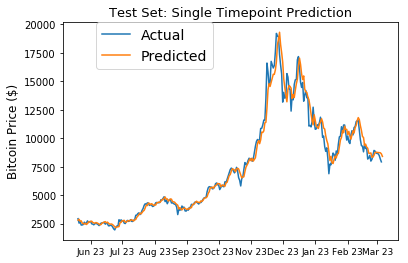

[  2805.73068788   2883.38156104   2706.57658272   2748.52713082
   2552.96058548   2499.59594309   2471.27293196   2540.12090936
   2427.87679768   2506.66626375   2660.27434616   2640.4734658
   2696.54598832   2717.49100342   2602.57355566   2564.33606529
   2536.13480449   2597.33397818   2569.95708561   2523.71913192
   2465.21617382   2396.65530026   2431.92200197   2571.51296439
   2578.37759542   2653.32168877   2675.71999474   2568.24238936
   2633.58280628   2542.3661027    2457.97739029   2467.24296613
   2468.21053073   2407.53677602   2320.04222667   2213.79874721
   2143.62360661   2211.98778224   2225.81920794   2242.85809754
   2586.10585613   2611.1477353    2757.56149937   2744.05440366
   2792.43195612   2638.01743984   2628.94978718   2732.80228443
   2769.93124037   2733.08942535   2787.69974661   2852.11412811
   2782.84469216   2739.63629186   2834.54516459   2868.3835727
   3065.42352653   3168.52310002   3313.94130325   3426.6277349
   3352.45668793   3467.9731

In [14]:
from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes
from mpl_toolkits.axes_grid1.inset_locator import mark_inset

fig, ax1 = plt.subplots(1,1)
ax1.set_xticks([datetime.date(2017+j,i+1,23)for j in range(2) for i in range(12)])
ax1.set_xticklabels([datetime.date(2017+j,i+1,23).strftime('%b %d')for j in range(2)  for i in range(12)],fontsize=9)
ax1.plot(model_data[model_data['DATE']>= split_date]['DATE'][window_len:].astype(datetime.datetime),
         test_set['LAST'][window_len:-1], label='Actual')
ax1.plot(new_model_data[new_model_data['DATE']>= split_date]['DATE'][window_len:].astype(datetime.datetime),
         ((np.transpose(bt_model.predict(LSTM_test_inputs))+1) * test_set['LAST'].values[:-window_len])[0], 
         label='Predicted')
#ax1.annotate('MAE: %.4f'%np.mean(np.abs((np.transpose(bt_model.predict(LSTM_test_inputs))+1)-\
#            (test_set['LAST'].values[window_len:])/(test_set['LAST'].values[:-window_len]))), 
#             xy=(0.75, 0.9),  xycoords='axes fraction',
#            xytext=(0.75, 0.9), textcoords='axes fraction')
ax1.set_title('Test Set: Single Timepoint Prediction',fontsize=13)
ax1.set_ylabel('Bitcoin Price ($)',fontsize=12)
ax1.legend(bbox_to_anchor=(0.1, 1), loc=2, borderaxespad=0., prop={'size': 14})
plt.show()
print(((np.transpose(bt_model.predict(LSTM_test_inputs))+1) * test_set['LAST'].values[:-window_len])[0])
print(test_set['LAST'][window_len:-1])
print(len(test_set['LAST'][window_len:-1]),len((bt_model.predict(LSTM_test_inputs))))

In [66]:
def build_model2(inputs, output_size, neurons, activ_func="tanh",
                dropout=0.25, loss="mse", optimizer="adam"):
    model = Sequential()
    model.add(LSTM(neurons, return_sequences=True, input_shape=(inputs.shape[1], inputs.shape[2]), activation=activ_func))
    model.add(Dropout(dropout))
    model.add(LSTM(neurons, return_sequences=True, activation=activ_func))
    model.add(Dropout(dropout))
    model.add(LSTM(neurons, activation=activ_func))
    model.add(Dropout(dropout))
    model.add(Dense(units=output_size))
    model.add(Activation(activ_func))
    model.compile(loss=loss, optimizer=optimizer, metrics=['mae'])
    return model

In [14]:
# random seed for reproducibility
np.random.seed(202)
# initialise model architecture
bt_model = build_model2(LSTM_training_inputs, output_size=1, neurons = 512)
# train model on data
# note: eth_history contains information on the training error per epoch
bt_history = bt_model.fit(LSTM_training_inputs, 
                            LSTM_training_outputs, 
                            epochs=50, batch_size=128, verbose=2, shuffle=True)
# #eth_model.save('eth_model%d.h5'%j)

Epoch 1/50
 - 6s - loss: 0.0173 - mean_absolute_error: 0.1120
Epoch 2/50
 - 3s - loss: 0.0235 - mean_absolute_error: 0.1136
Epoch 3/50
 - 3s - loss: 0.0144 - mean_absolute_error: 0.0940
Epoch 4/50
 - 3s - loss: 0.0137 - mean_absolute_error: 0.0930
Epoch 5/50
 - 3s - loss: 0.0116 - mean_absolute_error: 0.0867
Epoch 6/50
 - 3s - loss: 0.0112 - mean_absolute_error: 0.0808
Epoch 7/50
 - 3s - loss: 0.0106 - mean_absolute_error: 0.0744
Epoch 8/50
 - 3s - loss: 0.0098 - mean_absolute_error: 0.0722
Epoch 9/50
 - 3s - loss: 0.0095 - mean_absolute_error: 0.0771
Epoch 10/50
 - 3s - loss: 0.0080 - mean_absolute_error: 0.0687
Epoch 11/50
 - 3s - loss: 0.0070 - mean_absolute_error: 0.0597
Epoch 12/50
 - 3s - loss: 0.0085 - mean_absolute_error: 0.0701
Epoch 13/50
 - 3s - loss: 0.0082 - mean_absolute_error: 0.0684
Epoch 14/50
 - 3s - loss: 0.0065 - mean_absolute_error: 0.0591
Epoch 15/50
 - 3s - loss: 0.0070 - mean_absolute_error: 0.0584
Epoch 16/50
 - 3s - loss: 0.0048 - mean_absolute_error: 0.0523
E

KeyboardInterrupt: 

In [ ]:
from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes
from mpl_toolkits.axes_grid1.inset_locator import mark_inset

fig, ax1 = plt.subplots(1,1)
ax1.set_xticks([datetime.date(2017+j,i+1,23)for j in range(2) for i in range(12)])
ax1.set_xticklabels([datetime.date(2017+j,i+1,23).strftime('%b %d')for j in range(2)  for i in range(12)],fontsize=9)
ax1.plot(model_data[model_data['DATE']>= split_date]['DATE'][window_len:].astype(datetime.datetime),
         test_set['LAST'][window_len:], label='Actual')
ax1.plot(model_data[model_data['DATE']>= split_date]['DATE'][window_len:].astype(datetime.datetime),
         ((np.transpose(bt_model.predict(LSTM_test_inputs))+1) * test_set['LAST'].values[:-window_len])[0], 
         label='Predicted')
#ax1.annotate('MAE: %.4f'%np.mean(np.abs((np.transpose(bt_model.predict(LSTM_test_inputs))+1)-\
#            (test_set['LAST'].values[window_len:])/(test_set['LAST'].values[:-window_len]))), 
#             xy=(0.75, 0.9),  xycoords='axes fraction',
#            xytext=(0.75, 0.9), textcoords='axes fraction')
ax1.set_title('Test Set: Single Timepoint Prediction',fontsize=13)
ax1.set_ylabel('Bitcoin Price ($)',fontsize=12)
ax1.legend(bbox_to_anchor=(0.1, 1), loc=2, borderaxespad=0., prop={'size': 14})
plt.show()

In [ ]:
# random seed for reproducibility
np.random.seed(202)
# we'll try to predict the closing price for the next 5 days 
# change this value if you want to make longer/shorter prediction
pred_range = 5
# initialise model architecture
bt_model = build_model1(LSTM_training_inputs, output_size=pred_range, neurons = 20)
# model output is next 5 prices normalised to 10th previous closing price
LSTM_training_outputs = []
for i in range(window_len, len(training_set['LAST'])-pred_range):
    LSTM_training_outputs.append((training_set['LAST'][i:i+pred_range].values/
                                  training_set['LAST'].values[i-window_len])-1)
LSTM_training_outputs = np.array(LSTM_training_outputs)
# train model on data
# note: eth_history contains information on the training error per epoch
bt_history = bt_model.fit(LSTM_training_inputs[:-pred_range], LSTM_training_outputs, 
                            epochs=50, batch_size=1, verbose=2, shuffle=True)

In [ ]:
from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes
from mpl_toolkits.axes_grid1.inset_locator import mark_inset

fig, ax1 = plt.subplots(1,1)
ax1.set_xticks([datetime.date(2017+j,i+1,20)for j in range(2) for i in range(12)])
ax1.set_xticklabels([datetime.date(2017+j,i+1,20).strftime('%b %d') for j in range(2) for i in range(12)],fontsize=9)
ax1.plot(model_data[model_data['DATE']>= split_date]['DATE'][10:].astype(datetime.datetime),
         test_set['LAST'][window_len:], label='Actual')
ax1.plot(model_data[model_data['DATE']>= split_date]['DATE'][10:].astype(datetime.datetime),
         ((np.transpose(bt_model.predict(LSTM_test_inputs))+1) * test_set['LAST'].values[:-window_len])[0], 
         label='Predicted')
#ax1.annotate('MAE: %.4f'%np.mean(np.abs((np.transpose(bt_model.predict(LSTM_test_inputs))+1)-\
            #(test_set['LAST'].values[window_len:])/(test_set['LAST'].values[:-window_len]))), 
             #xy=(0.75, 0.9),  xycoords='axes fraction',
            #xytext=(0.75, 0.9), textcoords='axes fraction')
ax1.set_title('Test Set: Single Timepoint Prediction',fontsize=13)
ax1.set_ylabel('Bitcoin Price ($)',fontsize=12)
ax1.legend(bbox_to_anchor=(0.1, 1), loc=2, borderaxespad=0., prop={'size': 14})
plt.show()

In [ ]:
# little bit of reformatting the predictions to closing prices

bt_pred_prices = ((bt_model.predict(LSTM_test_inputs)[:-pred_range][::pred_range]+1)*\
                   test_set['LAST'].values[:-(window_len + pred_range)][::5].reshape(int(np.ceil((len(LSTM_test_inputs)-pred_range)/float(pred_range))),1))

pred_colors = ["#FF69B4", "#5D6D7E", "#F4D03F","#A569BD","#45B39D"]
fig, (ax1) = plt.subplots(1,1)
ax1.set_xticks([datetime.date(2017+j,i+1,20)for j in range(2) for i in range(12)])
ax1.set_xticklabels([datetime.date(2017+j,i+1,20).strftime('%b %d')for j in range(2)  for i in range(12)])
ax1.plot(model_data[model_data['DATE']>= split_date]['DATE'][window_len:].astype(datetime.datetime),
         test_set['LAST'][window_len:], label='Actual')
for i, (bt_pred) in enumerate(bt_pred_prices):
    # Only adding lines to the legend once
    if i<5:
        ax1.plot(model_data[model_data['DATE']>= split_date]['DATE'][window_len:].astype(datetime.datetime)[pred_range:pred_range+pred_range],
                 bt_pred, color=pred_colors[i%5], label="Predicted")
    else: 
        ax1.plot(model_data[model_data['DATE']>= split_date]['DATE'][window_len:].astype(datetime.datetime)[i*pred_range:i*pred_range+pred_range],
                 bt_pred, color=pred_colors[i%5])
ax1.set_title('Test Set: 5 Timepoint Predictions',fontsize=13)
ax1.set_ylabel('Bitcoin Price ($)',fontsize=12)
ax1.legend(bbox_to_anchor=(0.13, 1), loc=2, borderaxespad=0., prop={'size': 12})
fig.tight_layout()
plt.show()